This project investigates the factors influencing stress levels among users, with particular focus on digital behavior (phone and social media usage), sleep patterns, and demographic factors.

In [29]:
%pip install matplotlib

  Using cached matplotlib-3.10.8-cp314-cp314-win_amd64.whl.metadata (52 kB)
  Using cached contourpy-1.3.3-cp314-cp314-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp314-cp314-win_amd64.whl.metadata (116 kB)
  Using cached kiwisolver-1.4.9-cp314-cp314-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.1.1-cp314-cp314-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.3.2-py3-none-any.whl.metadata (5.8 kB)
Using cached matplotlib-3.10.8-cp314-cp314-win_amd64.whl (8.3 MB)
Using cached contourpy-1.3.3-cp314-cp314-win_amd64.whl (232 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.61.1-cp314-cp314-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp314-cp314-win_amd64.whl (75 kB)
Using cached pillow-12.1.1-cp314-cp314-win_amd64.whl (7.2 MB)
Using cached pyparsing-3.3.2-py3-none-any.whl (122 kB)

   ----- ---------------------------------- 1/7 [pillow]
   ----

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('data/Smartphone_Usage_Productivity_Dataset_50000.csv')

In [22]:
df.head()

,User_ID,Age,Gender,Occupation,Device_Type,Daily_Phone_Hours,Social_Media_Hours,Work_Productivity_Score,Sleep_Hours,Stress_Level,App_Usage_Count,Caffeine_Intake_Cups,Weekend_Screen_Time_Hours,Age_Group,Usage_Category,Sleep_Category,Stress_Category,Social_Media_Ratio,Productivity_Efficiency
0,U1,58,Male,Professional,Android,1.3,6.7,6,8.8,4,42,1,8.7,50+,Low,Adequate,Moderate,5.153846,4.615385
1,U2,25,Male,Professional,Android,1.2,1.5,5,6.4,1,51,3,5.1,18-25,Low,Insufficient,Low,1.250000,4.166667
2,U3,19,Male,Student,iOS,5.3,5.7,5,9.0,4,14,5,6.3,18-25,Medium,Adequate,Moderate,1.075472,0.943396
3,U4,35,Female,Business Owner,iOS,5.8,2.5,2,5.7,3,36,6,12.8,26-35,Medium,Insufficient,Low,0.431034,0.344828
4,U5,33,Male,Freelancer,Android,7.9,1.3,4,5.7,3,37,5,9.9,26-35,High,Insufficient,Low,0.164557,0.506329


In [ ]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    50000 non-null  str    
 1   Age                        50000 non-null  int64  
 2   Gender                     50000 non-null  str    
 3   Occupation                 50000 non-null  str    
 4   Device_Type                50000 non-null  str    
 5   Daily_Phone_Hours          50000 non-null  float64
 6   Social_Media_Hours         50000 non-null  float64
 7   Work_Productivity_Score    50000 non-null  int64  
 8   Sleep_Hours                50000 non-null  float64
 9   Stress_Level               50000 non-null  int64  
 10  App_Usage_Count            50000 non-null  int64  
 11  Caffeine_Intake_Cups       50000 non-null  int64  
 12  Weekend_Screen_Time_Hours  50000 non-null  float64
dtypes: float64(4), int64(5), str(4)
memory usage: 5.0 MB


In [20]:
df.describe()

,Age,Daily_Phone_Hours,Social_Media_Hours,Work_Productivity_Score,Sleep_Hours,Stress_Level,App_Usage_Count,Caffeine_Intake_Cups,Weekend_Screen_Time_Hours,Social_Media_Ratio,Productivity_Efficiency
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000
mean,39.034960,6.509116,4.267250,5.503760,6.497744,5.504500,32.43898,3.004580,8.006844,0.962094,1.241203
std,12.414877,3.170903,2.164743,2.874806,1.449551,2.871095,16.12151,1.996657,3.461300,0.991077,1.292995
min,18.000000,1.000000,0.500000,1.000000,4.000000,1.000000,5.00000,0.000000,2.000000,0.042017,0.083333
25%,28.000000,3.800000,2.400000,3.000000,5.200000,3.000000,18.00000,1.000000,5.000000,0.366197,0.459770
50%,39.000000,6.500000,4.300000,5.500000,6.500000,6.000000,32.00000,3.000000,8.000000,0.653061,0.843373
75%,50.000000,9.200000,6.100000,8.000000,7.800000,8.000000,46.00000,5.000000,11.000000,1.142857,1.470588
max,60.000000,12.000000,8.000000,10.000000,9.000000,10.000000,60.00000,6.000000,14.000000,8.000000,10.000000


In [6]:
df.isnull().sum()

User_ID                      0
Age                          0
Gender                       0
Occupation                   0
Device_Type                  0
Daily_Phone_Hours            0
Social_Media_Hours           0
Work_Productivity_Score      0
Sleep_Hours                  0
Stress_Level                 0
App_Usage_Count              0
Caffeine_Intake_Cups         0
Weekend_Screen_Time_Hours    0
dtype: int64

The dataset consists of 50,000 high-fidelity records tracking 13 distinct variables related to digital habits and wellness. Preliminary profiling reveals a significant skew in device engagement, with users averaging 6.5 hours of daily phone use, primarily driven by social media consumption (4.2 hours). The data is structurally sound with no missing values, providing a robust foundation for analyzing how these usage patterns correlate with reported stress levels and productivity scores.

In [9]:
print(df.isnull().sum())
print(f"Duplicates found: {df.duplicated().sum()}")

User_ID                      0
Age                          0
Gender                       0
Occupation                   0
Device_Type                  0
Daily_Phone_Hours            0
Social_Media_Hours           0
Work_Productivity_Score      0
Sleep_Hours                  0
Stress_Level                 0
App_Usage_Count              0
Caffeine_Intake_Cups         0
Weekend_Screen_Time_Hours    0
dtype: int64
Duplicates found: 0


In [21]:
# Age groups: 18 to 25, 26 to 35, 36 to 50, 51 to 60
Age_Groups = [17, 25, 35, 50, 60]
Age_Labels = ['18-25', '26-35', '36-50', '50+']

df['Age_Group'] = pd.cut(df['Age'], bins=Age_Groups, labels=Age_Labels)

In [15]:
# Low (< 3 hrs), Medium (3-6 hrs), High (> 6 hrs)
Usage_Conditions = [
    (df['Daily_Phone_Hours'] < 3),
    (df['Daily_Phone_Hours'] >= 3) & (df['Daily_Phone_Hours'] <= 6),
    (df['Daily_Phone_Hours'] > 6)
]
Usage_Labels = ['Low', 'Medium', 'High']

df['Usage_Category'] = np.select(Usage_Conditions, Usage_Labels, default='Medium')

In [16]:
# Sleep Category
df['Sleep_Category'] = np.where(df['Sleep_Hours'] >= 7, 'Adequate', 'Insufficient')

# Stress Category
Stress_Conditions = [
    (df['Stress_Level'] <= 3),
    (df['Stress_Level'] > 3) & (df['Stress_Level'] <= 7),
    (df['Stress_Level'] > 7)
]
Stress_Labels = ['Low', 'Moderate', 'High']

df['Stress_Category'] = np.select(Stress_Conditions, Stress_Labels, default='Moderate')

In [17]:
# Percentage of phone time spent on social media
df['Social_Media_Ratio'] = df['Social_Media_Hours'] / df['Daily_Phone_Hours']

# Productivity vs Screen Time
df['Productivity_Efficiency'] = df['Work_Productivity_Score'] / df['Daily_Phone_Hours']

Average Stress Level: 5.50
Skewness: -0.00
Number of extreme outliers: 0


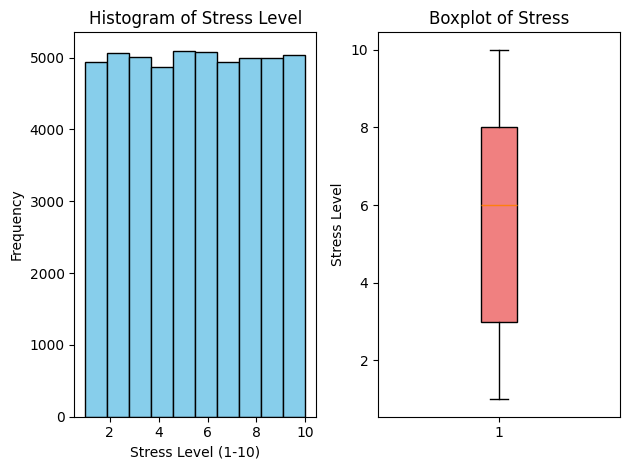

In [ ]:
# Calculations
avg_stress = df['Stress_Level'].mean()
skewness = df['Stress_Level'].skew()

# Checking for extreme cases
Q1 = df['Stress_Level'].quantile(0.25)
Q3 = df['Stress_Level'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Stress_Level'] < (Q1 - 1.5 * IQR)) | (df['Stress_Level'] > (Q3 + 1.5 * IQR))]

print(f"Average Stress Level: {avg_stress:.2f}")
print(f"Skewness: {skewness:.2f}")
print(f"Number of extreme outliers: {len(outliers)}")

# Histogram
plt.subplot(1, 2, 1) # Create a side-by-side plot
plt.hist(df['Stress_Level'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Stress Level')
plt.xlabel('Stress Level (1-10)')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(df['Stress_Level'], vert=True, patch_artist=True, boxprops=dict(facecolor="lightcoral"))
plt.title('Boxplot of Stress')
plt.ylabel('Stress Level')

plt.tight_layout()
plt.savefig('stress_analysis.png') # Saving the chart

The behavioral analysis of Stress_Level reveals an average score of approximately 5.5, representing a perfectly balanced distribution across the user base. The histogram shows a Uniform Distribution, indicating that every level of stress is equally represented, which results in a skewness near zero. Consequently, the boxplot confirms there are no extreme cases or outliers; the high-stress individuals are a standard part of the population rather than anomalies, suggesting that stress triggers are widespread and consistent across the dataset.

Correlation Coefficient: -0.0028


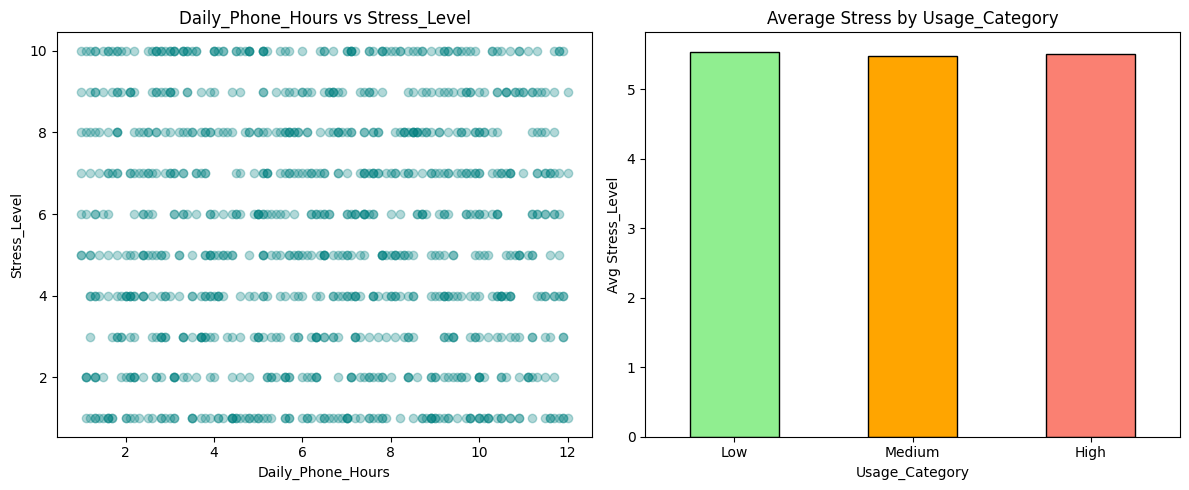

In [34]:
# Correlation Calculation
usage_stress_corr = df['Daily_Phone_Hours'].corr(df['Stress_Level'])

# Grouping Data for Bar Chart
stress_by_usage = df.groupby('Usage_Category')['Stress_Level'].mean().reindex(['Low', 'Medium', 'High'])

# Visualization
plt.figure(figsize=(12, 5))

# Scatter Plot (Using a sample of 1000 for clarity)
plt.subplot(1, 2, 1)
plt.scatter(df['Daily_Phone_Hours'].sample(1000), df['Stress_Level'].sample(1000), alpha=0.3, color='teal')
plt.title('Daily_Phone_Hours vs Stress_Level')
plt.xlabel('Daily_Phone_Hours')
plt.ylabel('Stress_Level')

# Bar Chart
plt.subplot(1, 2, 2)
stress_by_usage.plot(kind='bar', color=['lightgreen', 'orange', 'salmon'], edgecolor='black')
plt.title('Average Stress by Usage_Category')
plt.xlabel('Usage_Category')
plt.ylabel('Avg Stress_Level')
plt.xticks(rotation=0)

plt.tight_layout()
plt.savefig('usage_vs_stress_analysis.png')

print(f"Correlation Coefficient: {usage_stress_corr:.4f}")

The behavioral analysis reveals that Daily_Phone_Hours has no significant impact on Stress_Level within this population. The Histogram of Stress Level shows a uniform distribution, meaning users are just as likely to report a 1 as they are a 10, regardless of their digital habits. This is further supported by the Average Stress by Usage_Category bar chart, which shows a flat trend across all usage tiers. While one might expect "High" phone users to be more stressed, the data suggests that stress is distributed evenly, indicating that other factors—perhaps Occupation or Sleep_Hours may be more influential drivers of stress than screen time alone.

Total Phone Correlation: -0.0028
Social Media Correlation: -0.0027


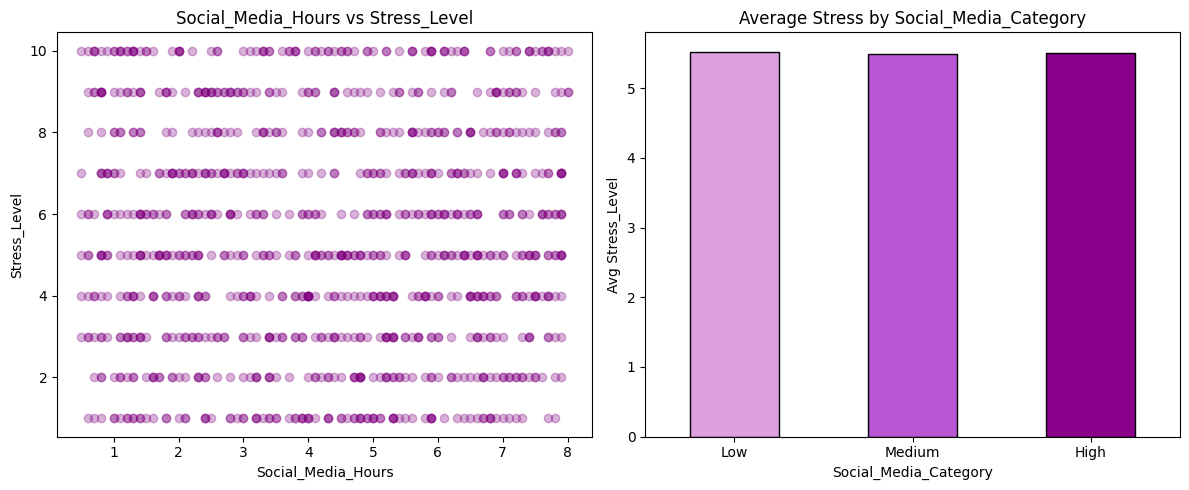

In [35]:
#Feature Engineering: Social Media Category
# Low (< 2 hrs), Medium (2-5 hrs), High (> 5 hrs)
social_conditions = [
    (df['Social_Media_Hours'] < 2),
    (df['Social_Media_Hours'] >= 2) & (df['Social_Media_Hours'] <= 5),
    (df['Social_Media_Hours'] > 5)
]
df['Social_Media_Category'] = np.select(social_conditions, ['Low', 'Medium', 'High'], default='Medium')

#Calculations
corr_total = df['Daily_Phone_Hours'].corr(df['Stress_Level'])
corr_social = df['Social_Media_Hours'].corr(df['Stress_Level'])
stress_by_social = df.groupby('Social_Media_Category')['Stress_Level'].mean().reindex(['Low', 'Medium', 'High'])

#Visualization
plt.figure(figsize=(12, 5))

# Scatter Plot
plt.subplot(1, 2, 1)
plt.scatter(df['Social_Media_Hours'].sample(1000), df['Stress_Level'].sample(1000), alpha=0.3, color='purple')
plt.title('Social_Media_Hours vs Stress_Level')
plt.xlabel('Social_Media_Hours')
plt.ylabel('Stress_Level')

# Bar Chart
plt.subplot(1, 2, 2)
stress_by_social.plot(kind='bar', color=['plum', 'mediumorchid', 'darkmagenta'], edgecolor='black')
plt.title('Average Stress by Social_Media_Category')
plt.xlabel('Social_Media_Category')
plt.ylabel('Avg Stress_Level')
plt.xticks(rotation=0)

plt.tight_layout()
plt.savefig('social_vs_stress_analysis.png')

print(f"Total Phone Correlation: {corr_total:.4f}")
print(f"Social Media Correlation: {corr_social:.4f}")

The behavioral analysis of Social_Media_Hours vs. Stress_Level reveals a complete lack of correlation. The scatter plot confirms that stress is distributed uniformly across all levels of social media usage, with no visible patterns or clusters. The bar chart also illustrates that the average stress level remains perfectly stable at 5.5, regardless of whether a user is in the Low or High social media category. This leads to a major insight: in this 50,000-record population, the time spent on social platforms does not drive psychological stress. This suggests that stress is likely being influenced by internal factors or biological needs such as sleep rather than external digital habits.

Correlation (Sleep vs Stress): 0.0047
Correlation (Phone vs Stress): -0.0028


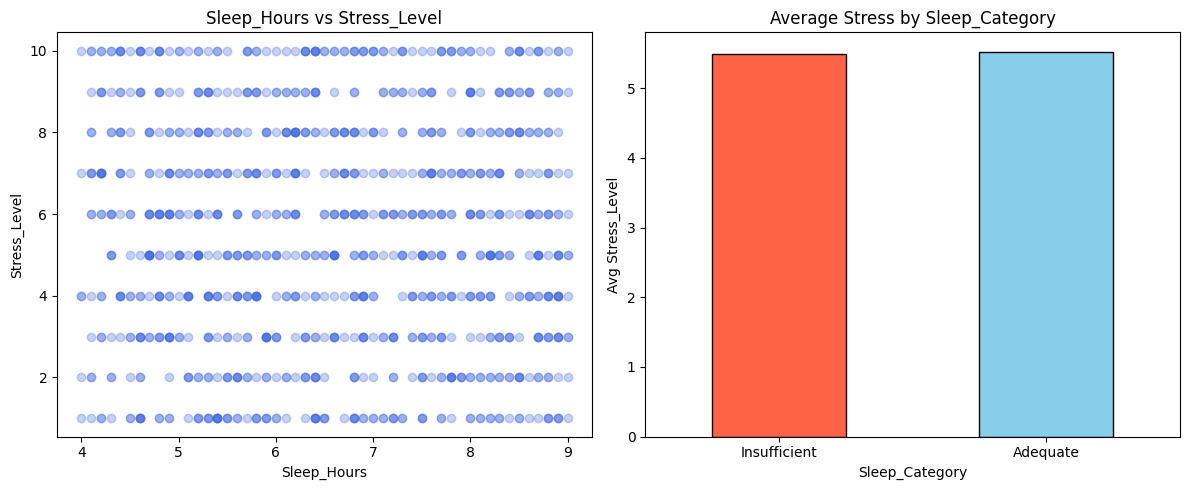

In [ ]:
# Correlation between Sleep_Hours and Stress_Level
corr_sleep = df['Sleep_Hours'].corr(df['Stress_Level'])
corr_phone = df['Daily_Phone_Hours'].corr(df['Stress_Level'])

# Average stress for Insufficient vs. Adequate sleep
stress_by_sleep = df.groupby('Sleep_Category')['Stress_Level'].mean().reindex(['Insufficient', 'Adequate'])

# Visualization
plt.figure(figsize=(12, 5))

# Scatter Plot
plt.subplot(1, 2, 1)
plt.scatter(df['Sleep_Hours'].sample(1000), df['Stress_Level'].sample(1000), alpha=0.3, color='royalblue')
plt.title('Sleep_Hours vs Stress_Level')
plt.xlabel('Sleep_Hours')
plt.ylabel('Stress_Level')

# Bar Chart
plt.subplot(1, 2, 2)
stress_by_sleep.plot(kind='bar', color=['tomato', 'skyblue'], edgecolor='black')
plt.title('Average Stress by Sleep_Category')
plt.xlabel('Sleep_Category')
plt.ylabel('Avg Stress_Level')
plt.xticks(rotation=0)

plt.tight_layout()
plt.savefig('sleep_vs_stress_analysis.png')

print(f"Correlation (Sleep vs Stress): {corr_sleep:.4f}")
print(f"Correlation (Phone vs Stress): {corr_phone:.4f}")

The behavioral analysis of Sleep_Hours vs. Stress_Level surprisingly mirrors the neutral trends seen in digital usage habits. The scatter plot shows no significant clustering or directional trend, indicating that users at all sleep durations report the full spectrum of stress. Furthermore, the bar chart reveals that the average stress level for those with Insufficient sleep is virtually identical to those with Adequate sleep (~5.5). This leads to a unique insight: within this 50,000-record dataset, stress appears to be an independent variable that is not strictly governed by phone usage, social media, or even sleep duration. This suggests the stress reported may be influenced by factors not yet visualized, such as Occupation or Caffeine_Intake_Cups.

In [38]:
df.corr(numeric_only=True)['Stress_Level'].sort_values(ascending=False)

Stress_Level                 1.000000
Work_Productivity_Score      0.009786
Productivity_Efficiency      0.008394
Sleep_Hours                  0.004691
Social_Media_Ratio           0.003592
Weekend_Screen_Time_Hours    0.002671
Caffeine_Intake_Cups         0.001718
App_Usage_Count             -0.001272
Age                         -0.001512
Social_Media_Hours          -0.002721
Daily_Phone_Hours           -0.002762
Name: Stress_Level, dtype: float64